<a href="https://colab.research.google.com/github/Sowdeswari26/EI/blob/main/recomendationsystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("kandij/mall-customers")
cpath=os.path.join(path,"Mall_Customers.csv")
dt=pd.read_csv(cpath)
dt.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
x = dt.iloc[:,[3,4]].values

In [36]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [37]:
#the elbow method
from sklearn.cluster import KMeans
error = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    error.append(kmeans.inertia_)

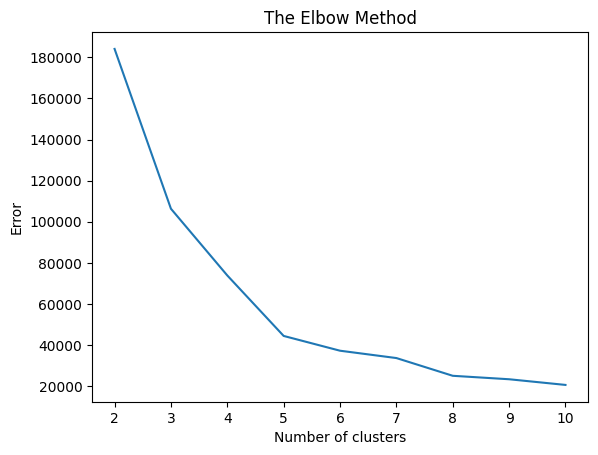

In [38]:
import matplotlib.pyplot as plt
plt.plot(range (2,11),error)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Error")
plt.show()

In [39]:
y = kmeans.predict(x)
y

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 7, 8, 7, 3, 5, 8, 5, 8,
       7, 8, 5, 3, 5, 8, 5, 8, 5, 3, 7, 3, 5, 3, 7, 8, 5, 3, 5, 3, 5, 8,
       5, 3, 5, 8, 5, 8, 7, 3, 5, 3, 7, 8, 5, 3, 7, 8, 5, 8, 5, 3, 5, 3,
       5, 8, 5, 3, 7, 3, 1, 3, 7, 3, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6,
       1, 6], dtype=int32)

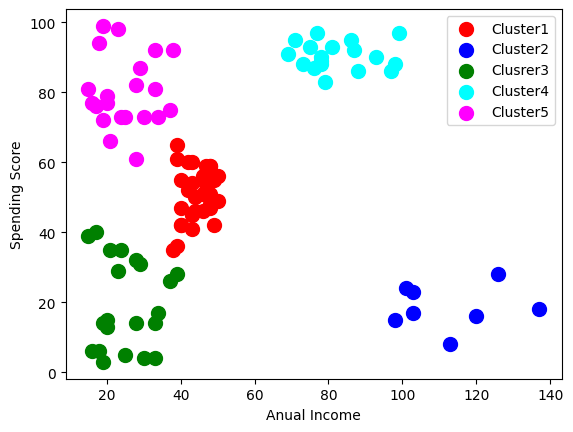

In [40]:
plt.scatter(x[y==0,0],x[y==0,1],s=100,c='red',label="Cluster1")
plt.scatter(x[y==1,0],x[y==1,1],s=100,c="blue",label="Cluster2")
plt.scatter(x[y==2,0],x[y==2,1],s=100,c="green",label="Clusrer3")
plt.scatter(x[y==3,0],x[y==3,1],s=100,c="cyan",label="Cluster4")
plt.scatter(x[y==4,0],x[y==4,1],s=100,c="magenta",label="Cluster5")
plt.xlabel("Anual Income")
plt.ylabel("Spending Score")
plt.legend()



In [41]:
dt['group']=kmeans.predict(x)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

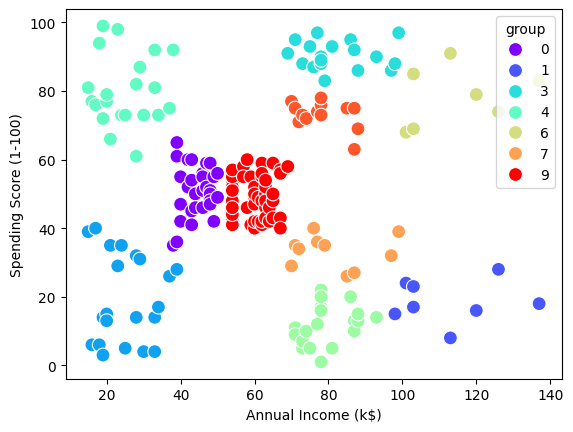

In [42]:
import seaborn as sns
sns.scatterplot(x = dt['Annual Income (k$)'],y=dt['Spending Score (1-100)'],hue = dt['group'],s = 100,palette='rainbow')

In [43]:
dt[dt['group']==1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group
182,183,Male,46,98,15,1
186,187,Female,54,101,24,1
188,189,Female,41,103,17,1
190,191,Female,34,103,23,1
192,193,Male,33,113,8,1
194,195,Female,47,120,16,1
196,197,Female,45,126,28,1
198,199,Male,32,137,18,1


In [44]:
kmeans.predict([[30,80]])

array([4], dtype=int32)

In [45]:
!git clone https://github.com/Sowdeswari26/EI.git


Cloning into 'EI'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 135.62 KiB | 1.00 MiB/s, done.


In [46]:
!mv recomendationsystem.ipynb EI/


mv: cannot stat 'recomendationsystem.ipynb': No such file or directory


In [48]:
!git config --global user.email "sowdeswari47@gmail.com"
!git config --global user.name "Sowdeswari26"
